# 🎓 Examen Final: SQL y Gestión de Datos (15 Puntos)

**Contexto:** Eres el Data Steward de la **Universidad Santo Tomás**. Se acerca el cierre de semestre y la decanatura requiere una gestión intensiva de la base de datos: desde registrar ofertas de última hora hasta generar los indicadores finales de deserción y carga académica.

**Instrucciones:**
* Asegúrate de tener el archivo **`universidad.db`** en esta misma carpeta.
* Cada punto tiene un valor de **1.0** sobre 15.
* Usa `conn.commit()` después de las sentencias de modificación (INSERT/UPDATE/DELETE).
* Usa `pd.read_sql_query` para las consultas de selección (SELECT).

---

In [10]:
# 🛠️ CONFIGURACIÓN INICIAL
import sqlite3
import pandas as pd
import os

db_filename = 'universidad.db'

if not os.path.exists(db_filename):
    print(f"⚠️ ERROR: No encuentro '{db_filename}'. Súbelo a esta carpeta.")
else:
    conn = sqlite3.connect(db_filename)
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys = ON;")
    print(f"✅ Conectado a '{db_filename}'. ¡Listo para el examen!")

✅ Conectado a 'universidad.db'. ¡Listo para el examen!


## 📝 Sección 1: Gestión Académica (DML) - 5 Puntos

**1. Apertura de Curso (INSERT)**
La facultad abre un nuevo curso electivo.
* Inserta en la tabla `Cursos`:
    * Nombre: **'Big Data & AI'**
    * Créditos: **5**
    * ID Profesor: **20**

**2. Nuevo Ingreso (INSERT)**
Registra a un nuevo estudiante en la tabla `Estudiantes`:
    * Nombre: **'Lionel'**
    * Apellido: **'Messi'**
    * Email: **'lio@usta.edu.co'**
    * Fecha Ingreso: '2024-11-25'

**3. Matrícula Manual (INSERT)**
Matricula al estudiante 'Lionel Messi' en el curso de 'Big Data & AI' que acabas de crear.
* *Pista:* Necesitarás averiguar primero qué ID le asignó la base de datos a Lionel y al curso.
* Nota final: `NULL`.

**4. Corrección de Créditos (UPDATE)**
El comité curricular decidió que 5 créditos es demasiado.
* Actualiza el curso 'Big Data & AI' para que tenga **3 créditos**.

**5. Retiro Definitivo (DELETE)**
El estudiante con **ID = 10** se retira de la universidad.
* Elimina todos sus registros de la tabla `Inscripciones` (para mantener la integridad, primero borramos sus clases).

In [ ]:
# Espacio para Código DML (Recuerda hacer commit)
# 1.
sql_insert_curso = """
INSERT INTO Cursos (nombre_curso, creditos, id_profesor) 
VALUES ('Big Data & AI', 5, 20);
"""
cursor = conn.cursor()
cursor.execute(sql_insert_curso)
conn.commit() 

df_verificacion = pd.read_sql_query("SELECT * FROM Cursos WHERE nombre_curso = 'Big Data & AI'", conn)
print("\nDataFrame de verificación:")
print(df_verificacion)



DataFrame de verificación:
   id_curso   nombre_curso  creditos  id_profesor
0       101  Big Data & AI         5           20


In [13]:
#2
sql_insert_estudiante = """
INSERT INTO Estudiantes (nombre, apellido, email, fecha_ingreso) 
VALUES ('Lionel', 'Messi', 'lio@usta.edu.co', '2024-11-25');
"""

cursor.execute(sql_insert_estudiante)
conn.commit() 


df_verificacion_estudiante = pd.read_sql_query(
    "SELECT nombre, apellido, email FROM Estudiantes WHERE email = 'lio@usta.edu.co'", 
    conn
)

print("\nDataFrame de verificación:")
print(df_verificacion_estudiante)


DataFrame de verificación:
   nombre apellido            email
0  Lionel    Messi  lio@usta.edu.co


In [19]:
#3
df_curso_id = pd.read_sql_query(
    "SELECT id_curso FROM Cursos WHERE nombre_curso = 'Big Data & AI'", 
    conn
)
curso_id = df_curso_id['id_curso'].iloc[0]
print(f"ID del Curso: {curso_id}")


df_estudiante_id = pd.read_sql_query(
    "SELECT id_estudiante FROM Estudiantes WHERE apellido = 'Messi'", 
    conn
)

estudiante_id = df_estudiante_id['id_estudiante'].iloc[0]

print(f"ID del Estudiante: {estudiante_id}")

sql_insert_matricula = f"""
INSERT INTO Inscripciones (id_estudiante, id_curso, nota_final) 
VALUES ({501}, {101}, NULL);
"""

cursor.execute(sql_insert_matricula)
conn.commit()

df_verificacion_matricula = pd.read_sql_query("""
SELECT 
    E.nombre || ' ' || E.apellido AS Estudiante, 
    C.nombre_curso AS Curso,
    M.nota_final
FROM Inscripciones M
JOIN Estudiantes E ON M.id_estudiante = E.id_estudiante
JOIN Cursos C ON M.id_curso = C.id_curso
WHERE E.apellido = 'Messi'
""", conn)

print("\nDataFrame de Matrícula Verificada:")
print(df_verificacion_matricula)

ID del Curso: 101
ID del Estudiante: 501

DataFrame de Matrícula Verificada:
     Estudiante          Curso nota_final
0  Lionel Messi  Big Data & AI       None


In [ ]:
#4
sql_update_creditos = """
UPDATE Cursos
SET creditos = 3
WHERE nombre_curso = 'Big Data & AI';
"""

cursor.execute(sql_update_creditos)
conn.commit() 

df_verificacion_update = pd.read_sql_query(
    "SELECT nombre_curso, creditos FROM Cursos WHERE nombre_curso = 'Big Data & AI'", 
    conn
)

print("\nDataFrame de verificación (Créditos actualizados):")
print(df_verificacion_update)


DataFrame de verificación (Créditos actualizados):
    nombre_curso  creditos
0  Big Data & AI         3


In [26]:
#5
sql_delete_inscripciones = """
DELETE FROM Inscripciones
WHERE id_estudiante = 10;
"""

cursor.execute(sql_delete_inscripciones)


sql_delete_estudiante = """
DELETE FROM Estudiantes
WHERE id_estudiante = 10;
"""

cursor.execute(sql_delete_estudiante)
conn.commit()

df_verificacion_delete = pd.read_sql_query(
    "SELECT * FROM Estudiantes WHERE id_estudiante = 10", 
    conn
)

print("\nDataFrame de verificación (debe estar vacío):")
print(df_verificacion_delete)


DataFrame de verificación (debe estar vacío):
Empty DataFrame
Columns: [id_estudiante, nombre, apellido, email, fecha_ingreso]
Index: []


## 🔍 Sección 2: Consultas SQL (Analysis) - 6 Puntos

**6. Métricas Generales (Agregación)**
Calcula y muestra:
* Cantidad total de estudiantes.
* Cantidad total de cursos ofertados.
* Promedio de créditos de los cursos.

**7. Auditoría de Profesores (LEFT JOIN)**
Necesitamos ver la carga laboral completa.
* Lista **todos** los profesores (Nombre y Apellido) y el curso que dictan.
* **Condición:** Deben aparecer los profesores que **NO** tienen cursos asignados actualmente (valor NULL).

**8. Popularidad (GROUP BY)**
* Genera una lista con el `Nombre del Curso` y la **Cantidad de Estudiantes** inscritos en él.
* Ordena del más popular al menos popular.

**9. Cursos Masivos (HAVING)**
* Basado en la consulta anterior, filtra para mostrar solo los cursos que tienen **más de 20 estudiantes** inscritos.

**10. Búsqueda Inteligente (Subconsulta)**
* Obtén el nombre y apellido de los estudiantes inscritos en el curso **"Bases de Datos"**.
* **Reto:** No uses el ID=1 directamente. Usa una subconsulta `(SELECT id_curso FROM Cursos WHERE nombre_curso = 'Bases de Datos')`.

**11. Sábana de Notas (INNER JOIN Múltiple)**
* Genera un reporte detallado que contenga:
    * Nombre Estudiante | Apellido Estudiante | Nombre Curso | Nota Final | Nombre Profesor

In [ ]:
# 6.
sql_total_estudiantes = "SELECT COUNT(id_estudiante) AS Total_Estudiantes FROM Estudiantes"

df_estudiantes = pd.read_sql_query(sql_total_estudiantes, conn)
print("--- Cantidad de Estudiantes ---")
print(df_estudiantes)

sql_total_cursos = "SELECT COUNT(id_curso) AS Total_Cursos FROM Cursos"

df_cursos = pd.read_sql_query(sql_total_cursos, conn)
print("\n--- Cantidad de Cursos ---")
print(df_cursos)

sql_promedio_creditos = "SELECT AVG(creditos) AS Promedio_Creditos FROM Cursos"

df_promedio = pd.read_sql_query(sql_promedio_creditos, conn)
print("\n--- Promedio de Créditos ---")
print(df_promedio)


--- Cantidad de Estudiantes ---
   Total_Estudiantes
0                500

--- Cantidad de Cursos ---
   Total_Cursos
0           101

--- Promedio de Créditos ---
   Promedio_Creditos
0            2.70297


In [ ]:
#7
sql_auditoria_profesores = """
SELECT
    P.nombre || ' ' || P.apellido AS Nombre_Profesor,
    C.nombre_curso AS Curso_Dictado
FROM Profesores P
LEFT JOIN Cursos C ON P.id_profesor = C.id_profesor;
"""

df_auditoria = pd.read_sql_query(sql_auditoria_profesores, conn)

print("\nAuditoría de Profesores")
print(df_auditoria)


--- Auditoría de Profesores (Carga Laboral Completa) ---
     Nombre_Profesor          Curso_Dictado
0        David Silva      Economía Avanzado
1        David Silva      Economía Avanzado
2        David Silva         Inglés Teórico
3        David Silva  Programación Aplicado
4        David Silva             Química II
..               ...                    ...
107    Fernando Ruiz                   None
108  Fernando Pineda                   None
109   Camila Jimenez                   None
110     Laura Torres                   None
111  Nicolas Jimenez                   None

[112 rows x 2 columns]


In [32]:
#8
sql_popularidad_cursos = """
SELECT
    C.nombre_curso AS Curso,
    COUNT(I.id_estudiante) AS Total_Estudiantes_Inscritos
FROM Cursos C
JOIN Inscripciones I ON C.id_curso = I.id_curso
GROUP BY C.nombre_curso
ORDER BY Total_Estudiantes_Inscritos DESC;
"""

df_popularidad = pd.read_sql_query(sql_popularidad_cursos, conn)

print("\nPopularidad de Cursos ")
print(df_popularidad)


Popularidad de Cursos 
                Curso  Total_Estudiantes_Inscritos
0   Economía Avanzado                          103
1      Ética Avanzado                           83
2      Bases de Datos                           70
3     Inglés Avanzado                           62
4          Inglés III                           61
..                ...                          ...
59  Historia Avanzado                           14
60      Estadística I                           13
61             Arte I                           13
62    Física Avanzado                           12
63      Big Data & AI                            1

[64 rows x 2 columns]


In [31]:
#9
sql_cursos_masivos = """
SELECT
    C.nombre_curso AS Curso,
    COUNT(I.id_estudiante) AS Total_Estudiantes_Inscritos
FROM Cursos C
JOIN Inscripciones I ON C.id_curso = I.id_curso
GROUP BY C.nombre_curso
HAVING COUNT(I.id_estudiante) > 20
ORDER BY Total_Estudiantes_Inscritos DESC;
"""

df_cursos_masivos = pd.read_sql_query(sql_cursos_masivos, conn)

print("\nCursos Masivos (Más de 20 estudiantes) ")
print(df_cursos_masivos)


Cursos Masivos (Más de 20 estudiantes) 
                    Curso  Total_Estudiantes_Inscritos
0       Economía Avanzado                          103
1          Ética Avanzado                           83
2          Bases de Datos                           70
3         Inglés Avanzado                           62
4              Inglés III                           61
5            Historia III                           60
6        Derecho Avanzado                           60
7              Biología I                           60
8     Estadística Teórico                           46
9      Sociología Teórico                           43
10           Ética Básico                           42
11  Programación Aplicado                           42
12              Ética III                           41
13             Química II                           41
14     Filosofía Aplicado                           41
15       Álgebra Avanzado                           40
16        Cálculo Teóric

In [34]:
#10
sql_busqueda_inteligente = """
SELECT
    E.nombre || ' ' || E.apellido AS Nombre_Completo
FROM Estudiantes E
JOIN Inscripciones I ON E.id_estudiante = I.id_estudiante
WHERE I.id_curso = (
    SELECT id_curso 
    FROM Cursos 
    WHERE nombre_curso = 'Bases de Datos'
);
"""

df_estudiantes_base_datos = pd.read_sql_query(sql_busqueda_inteligente, conn)

print("\n Estudiantes Inscritos en 'Bases de Datos' ")
print(df_estudiantes_base_datos)


 Estudiantes Inscritos en 'Bases de Datos' 
    Nombre_Completo
0    Diego Martinez
1      Lucia Zainea
2        Oscar Mora
3   Fernando Zainea
4      Valeria Maya
..              ...
65   David Martinez
66     Nicolas Mora
67    Hector Ortega
68  Hector Martinez
69   Ricardo Ortega

[70 rows x 1 columns]


In [35]:
#11
sql_sabana_notas = """
SELECT
    E.nombre AS Nombre_Estudiante,
    E.apellido AS Apellido_Estudiante,
    C.nombre_curso AS Nombre_Curso,
    I.nota_final AS Nota_Final,
    P.nombre || ' ' || P.apellido AS Nombre_Profesor
FROM Estudiantes E
INNER JOIN Inscripciones I ON E.id_estudiante = I.id_estudiante
INNER JOIN Cursos C ON I.id_curso = C.id_curso
INNER JOIN Profesores P ON C.id_profesor = P.id_profesor;
"""

df_sabana_notas = pd.read_sql_query(sql_sabana_notas, conn)

print("\n Sábana de Notas Detallada ")
print(df_sabana_notas)


 Sábana de Notas Detallada 
     Nombre_Estudiante Apellido_Estudiante     Nombre_Curso  Nota_Final  \
0              Esteban               Perez   Bases de Datos         3.8   
1                Mateo              Pineda   Bases de Datos         4.5   
2                Elena             Navarro   Bases de Datos         1.9   
3                Sofia             Mendoza   Bases de Datos         2.5   
4                Elena           Gutierrez   Bases de Datos         2.5   
...                ...                 ...              ...         ...   
2019             David                Ruiz  Inglés Avanzado         1.8   
2020             David                Ruiz  Economía Básico         2.9   
2021             David                Ruiz        Ética III         2.1   
2022             David                Ruiz  Inglés Avanzado         2.6   
2023            Lionel               Messi    Big Data & AI         NaN   

      Nombre_Profesor  
0         Andres Rios  
1         Andres Rios 

## 📊 Sección 3: Analítica con Python (Pandas) - 4 Puntos

**12. Carga de Datos**
* Ejecuta la consulta del punto 11 (Sábana de Notas) y guárdala en un DataFrame llamado `df_notas`.
* Muestra las primeras 5 filas y usa `.info()` para verificar tipos de datos.

**13. Análisis de Riesgo**
* Filtra el DataFrame `df_notas` para encontrar a los estudiantes que van perdiendo (Nota < 3.0).
* Guárdalos en un nuevo DF `df_riesgo` y cuenta cuántos son.

**14. Tabla Pivote (Cruce de Variables)**
* Crea una tabla dinámica que muestre el **Promedio de Notas** (values) organizados por `Nombre Curso` (index) y `Nombre Profesor` (columns).

**15. Visualización (Gráfico)**
* Usando el DataFrame `df_notas`, crea un histograma o un gráfico de barras que muestre la distribución de las notas finales.
* *Opcional:* Un gráfico de barras con el Top 5 de cursos con más estudiantes.

In [39]:
#12
sql_sabana_notas = """
SELECT
    E.nombre AS Nombre_Estudiante,
    E.apellido AS Apellido_Estudiante,
    C.nombre_curso AS Nombre_Curso,
    I.nota_final AS Nota_Final,
    P.nombre || ' ' || P.apellido AS Nombre_Profesor
FROM Estudiantes E
INNER JOIN Inscripciones I ON E.id_estudiante = I.id_estudiante
INNER JOIN Cursos C ON I.id_curso = C.id_curso
INNER JOIN Profesores P ON C.id_profesor = P.id_profesor;
"""

# Cargar el DataFrame 
df_notas = pd.read_sql_query(sql_sabana_notas, conn)

print(" Primeras 5 Filas de df_notas ")
print(df_notas.head())

print("\n Información del DataFrame (df.info()) ")
df_notas.info()

 Primeras 5 Filas de df_notas 
  Nombre_Estudiante Apellido_Estudiante    Nombre_Curso  Nota_Final  \
0           Esteban               Perez  Bases de Datos         3.8   
1             Mateo              Pineda  Bases de Datos         4.5   
2             Elena             Navarro  Bases de Datos         1.9   
3             Sofia             Mendoza  Bases de Datos         2.5   
4             Elena           Gutierrez  Bases de Datos         2.5   

  Nombre_Profesor  
0     Andres Rios  
1     Andres Rios  
2     Andres Rios  
3     Andres Rios  
4     Andres Rios  

 Información del DataFrame (df.info()) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2024 entries, 0 to 2023
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nombre_Estudiante    2024 non-null   object 
 1   Apellido_Estudiante  2024 non-null   object 
 2   Nombre_Curso         2024 non-null   object 
 3   Nota_Final          

In [40]:
#13
df_riesgo = df_notas[df_notas['Nota_Final'] < 3.0]

total_riesgo = df_riesgo.shape[0]

print("\n Estudiantes en Análisis de Riesgo (Nota < 3.0) ")
print(df_riesgo)
print(f"\nTotal de estudiantes en riesgo: {total_riesgo}")


 Estudiantes en Análisis de Riesgo (Nota < 3.0) 
     Nombre_Estudiante Apellido_Estudiante     Nombre_Curso  Nota_Final  \
2                Elena             Navarro   Bases de Datos         1.9   
3                Sofia             Mendoza   Bases de Datos         2.5   
4                Elena           Gutierrez   Bases de Datos         2.5   
7                Mateo               Silva   Bases de Datos         2.0   
8                Jorge                Mora   Bases de Datos         1.9   
...                ...                 ...              ...         ...   
2018             David                Ruiz          Arte II         2.4   
2019             David                Ruiz  Inglés Avanzado         1.8   
2020             David                Ruiz  Economía Básico         2.9   
2021             David                Ruiz        Ética III         2.1   
2022             David                Ruiz  Inglés Avanzado         2.6   

      Nombre_Profesor  
2         Andres Rios  
3

In [41]:
#14
df_tabla_pivot = pd.pivot_table(
    df_notas, 
    index='Nombre_Curso',          
    columns='Nombre_Profesor',       
    values='Nota_Final',           
    aggfunc='mean'                 
)

print("\n Tabla Dinámica: Promedio de Notas por Curso y Profesor ")
print(df_tabla_pivot)


 Tabla Dinámica: Promedio de Notas por Curso y Profesor 
Nombre_Profesor  Ana Diaz  Ana Jimenez  Andres Navarro  Andres Rios  \
Nombre_Curso                                                          
Arte Aplicado         NaN          NaN             NaN          NaN   
Arte Avanzado         NaN          NaN             NaN          NaN   
Arte General          NaN          NaN             NaN          NaN   
Arte I                NaN          NaN             NaN     2.969231   
Arte II               NaN          NaN             NaN          NaN   
...                   ...          ...             ...          ...   
Álgebra Básico        NaN          NaN             NaN          NaN   
Álgebra General       NaN          NaN             NaN          NaN   
Ética Avanzado        NaN          NaN             NaN          NaN   
Ética Básico          NaN          NaN             NaN          NaN   
Ética III             NaN          NaN             NaN     2.880000   

Nombre_Profesor  B

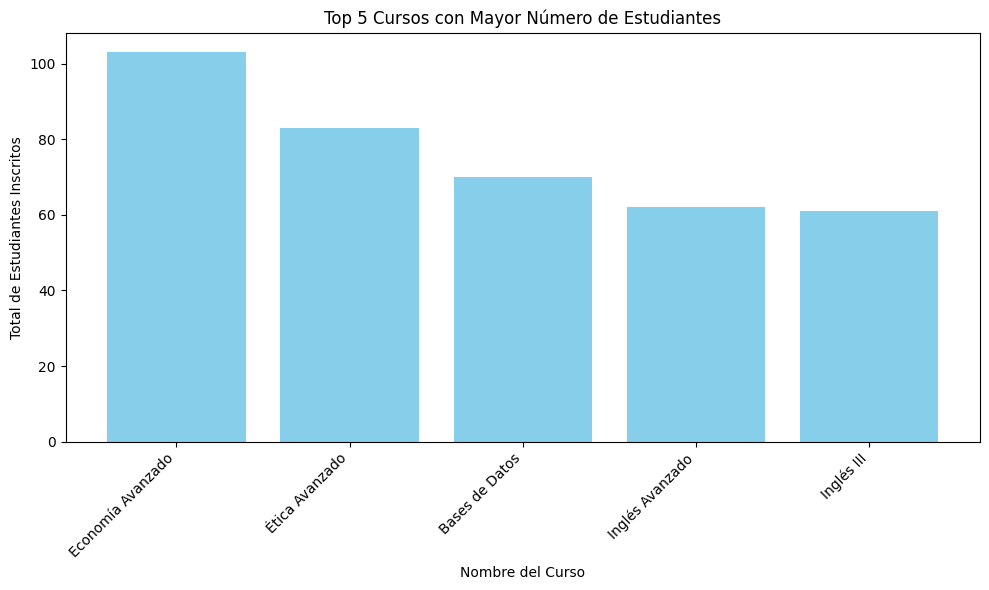

In [ ]:
#15
import matplotlib.pyplot as plt
sql_popularidad_cursos = """
SELECT
    C.nombre_curso AS Curso,
    COUNT(I.id_estudiante) AS Total_Estudiantes
FROM Cursos C
JOIN Inscripciones I ON C.id_curso = I.id_curso
GROUP BY C.nombre_curso
ORDER BY Total_Estudiantes DESC
LIMIT 5; -- Agregamos LIMIT 5 para el Top 5
"""
df_top_cursos = pd.read_sql_query(sql_popularidad_cursos, conn)

# grafico
plt.figure(figsize=(10, 6))
plt.bar(
    df_top_cursos['Curso'], 
    df_top_cursos['Total_Estudiantes'], 
    color='skyblue'
)
plt.title('Top 5 Cursos con Mayor Número de Estudiantes')
plt.xlabel('Nombre del Curso')
plt.ylabel('Total de Estudiantes Inscritos')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas para que no se superpongan
plt.tight_layout()
plt.show()

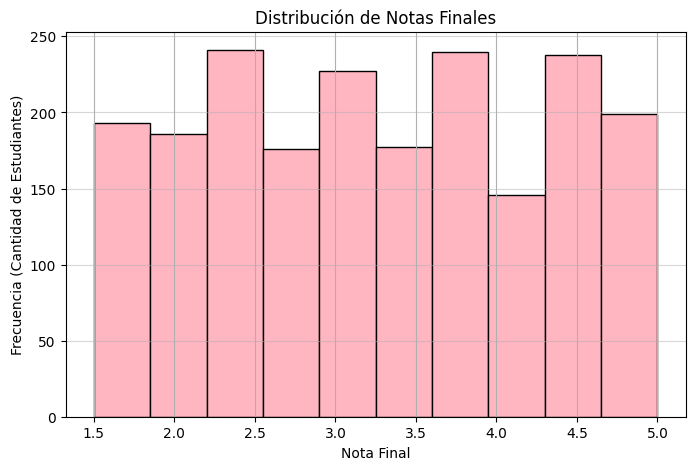

In [46]:
#15 continuacion
plt.figure(figsize=(8, 5))
df_notas['Nota_Final'].hist(bins=10, edgecolor='black', color='lightpink') # 10 bins es común para notas
plt.title('Distribución de Notas Finales')
plt.xlabel('Nota Final')
plt.ylabel('Frecuencia (Cantidad de Estudiantes)')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:

conn.close()
print("Examen Finalizado!")

¡Examen Finalizado!


In [48]:
print("Examen Finalizado!")

Examen Finalizado!
